In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import json

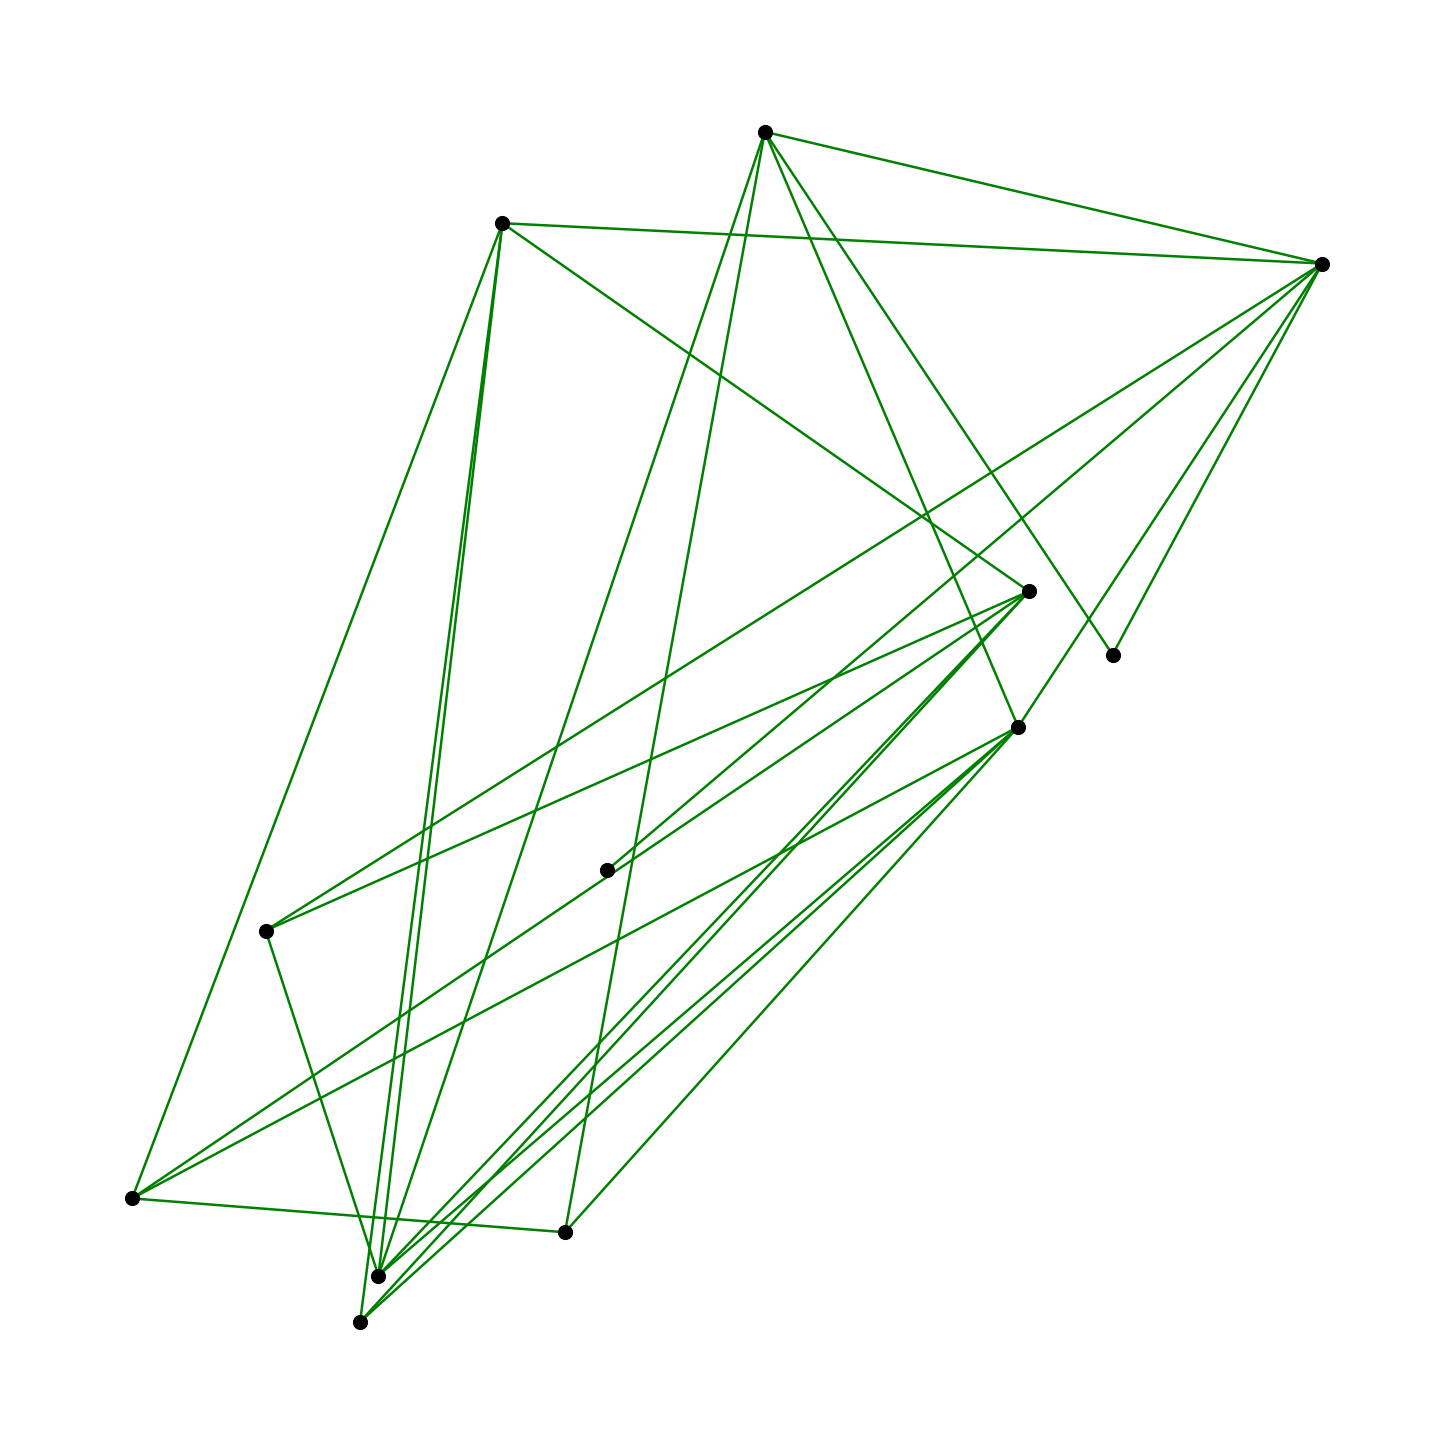

In [46]:
G = nx.fast_gnp_random_graph(12, 0.30)
pos = nx.random_layout(G)

plt.figure(1, figsize=(20, 20))
nx.draw(G, pos, node_color="black", width=2.5, edge_color="green", node_size=200)

plt.savefig("images/sample5.png", format="PNG")

In [37]:
with open("../Soft/fdeb/test/edges.csv", "w") as f:
    for (v, u) in G.edges():
        print(f"{v} {u}", file=f)
    print(file=f)

with open("../Soft/fdeb/test/nodes.csv", "w") as f:
    for node, array in pos.items():
        x, y = array[0], array[1]
        x *= 2000
        x -= 1000
        y *= 2000
        y -= 1000
        print(f"{node} {x} {y}", file=f)
    print(file=f)

In [115]:
epb_data = "../Soft/edge-path-bundling/data/random.json"

links = []
for (v, u) in G.edges():
    links.append({"source": str(v), "target": str(u)})
    
nodes = []
for node, array in pos.items():
    x, y = array[0], array[1]
    x = int(50 * x)
    y = int(50 * y)
    nodes.append({"x": str(x), "y": str(y), "id": str(node)})

ebp_graph_dict = {"directed": False, "graph": {"edge_default": {}, "node_default": {}}, "links": links, "nodes": nodes, "multigraph": False}

In [118]:
with open(epb_data, "w") as f:
    json.dump(ebp_graph_dict, f)